In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

1024


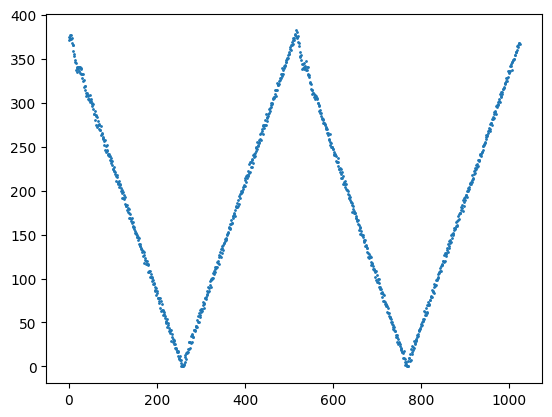

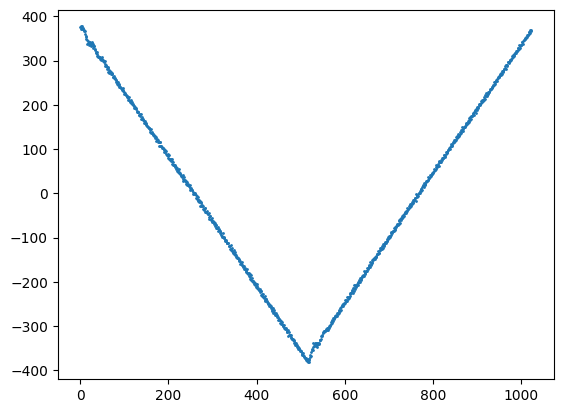

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 512
    # variables        = 2
    chi-square         = 5388.82864
    reduced chi-square = 10.5663307
    Akaike info crit   = 1209.12445
    Bayesian info crit = 1217.60110
    R-squared          = 0.99977380
[[Variables]]
    slope:     -4.8565e-05 +/- 3.2347e-08 (0.07%) (init = -5e-05)
    intercept:  0.01245760 +/- 9.5478e-06 (0.08%) (init = 0.015)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8656
None
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 512
    # variables        = 2
    chi-square         = 5153.93486
    reduced chi-square = 10.1057546
    Akaike info crit   = 1186.30586
    Bayesian info crit = 1194.78251
    R-squared          = 0.99978378
[[Variables]]
    slope:      4.8578e-05 +/- 3.1634e-08 (0.07%) (init = 500000)
    intercept: -0.03733839 +/- 2.4725e-05 (0.07%) 

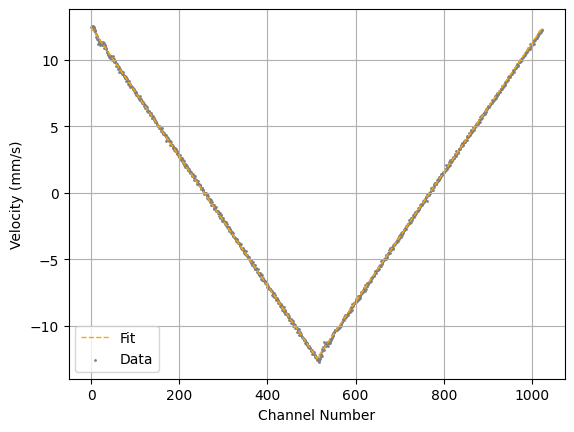

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import sqrt
import scipy.constants as c



spectrum = np.loadtxt('data/VelocityCalibration_2025-12-15_10-03-29_10_seconds.txt', delimiter = ' ', skiprows = 0)
print(spectrum.shape[0])
plt.scatter(np.arange(spectrum.shape[0]),spectrum,s=1)
#new_spectrum = spectrum[:512] + spectrum[512:]
#plt.scatter(np.arange(spectrum.shape[0]/2),new_spectrum)

plt.show()

new2_spectrum = spectrum
new2_spectrum[int(1024/4):int(1024/4*3)] *= -1

plt.scatter(np.arange(new2_spectrum.shape[0]),new2_spectrum,s=1)
plt.show()




from lmfit.models import LinearModel
from lmfit import Minimizer, report_fit,create_params


model = LinearModel()

spectrum_left = new2_spectrum[:512]
spectrum_right = new2_spectrum[512:]
params_left = create_params(slope = -5e-5, intercept = 0.015)
params_right = create_params(slope=5e5,intercept=-0.03)
#whats the uncertainty on this? idk I think he said about one
y_uncertainty = np.ones(len(spectrum_left))
lambda_0 = 650e-9  # meters
scan_time = 10  # seconds

velocity_left = lambda_0 / (2 * scan_time) *spectrum_left *1024
velocity_right = lambda_0 / (2 * scan_time) *spectrum_right *1024
velocity_uncertainty_left = lambda_0 / (2 * scan_time) * y_uncertainty *1024
velocity_uncertainty_right = lambda_0 / (2 * scan_time) * y_uncertainty *1024






x_data_left = np.arange(spectrum_left.shape[0])
result1 = model.fit(velocity_left, params_left, x=x_data_left, weights=1/velocity_uncertainty_left)
bestfit1 = result1.best_fit
dely1 = result1.eval_uncertainty(sigma=1)



x_data_right = np.arange(spectrum_right.shape[0]) + spectrum_left.shape[0] 
result2 = model.fit(velocity_right,params_right, x= x_data_right, weights = 1/velocity_uncertainty_right)
bestfit2 = result2.best_fit
dely2 = result2.eval_uncertainty(sigma=1)


print(report_fit(result1))
print(report_fit(result2))


results = np.zeros(1024)
results[:512]= bestfit1
results[512:]= bestfit2

result_unc = np.zeros(1024)
result_unc[:512]=dely1
result_unc[512:]=dely2
x_data = np.arange(1024)
plt.plot(x_data,results*10**3,color="orange",label='Fit',linestyle='--',linewidth=1)
plt.ylabel('Velocity (mm/s)')
plt.xlabel('Channel Number')
plt.fill_between(x_data, (results - result_unc)*10**3, (results + result_unc)*10**3, color='gray', alpha=0.5)
plt.scatter(x_data, new2_spectrum * lambda_0 / (2 * scan_time) * 1024 *10**3, s=1, color='gray', label='Data')
plt.legend()
plt.grid()
plt.show()
#print(results)

data_to_save = np.column_stack((x_data, results, result_unc))
np.savetxt('fit_results.csv', data_to_save, delimiter=',', 
           header='x,y_fit,uncertainty', comments='')









# fitted parameters
m1 = result1.params['slope'].value
b1 = result1.params['intercept'].value

def v_left(x):
    return m1 * x + b1


m2 = result2.params['slope'].value
b2 = result2.params['intercept'].value

def v_right(x):
    return m2 * x + b2


def v(channel):
    if channel <= 512:
        return v_left(channel)
    if channel > 512:
        return v_right(channel)

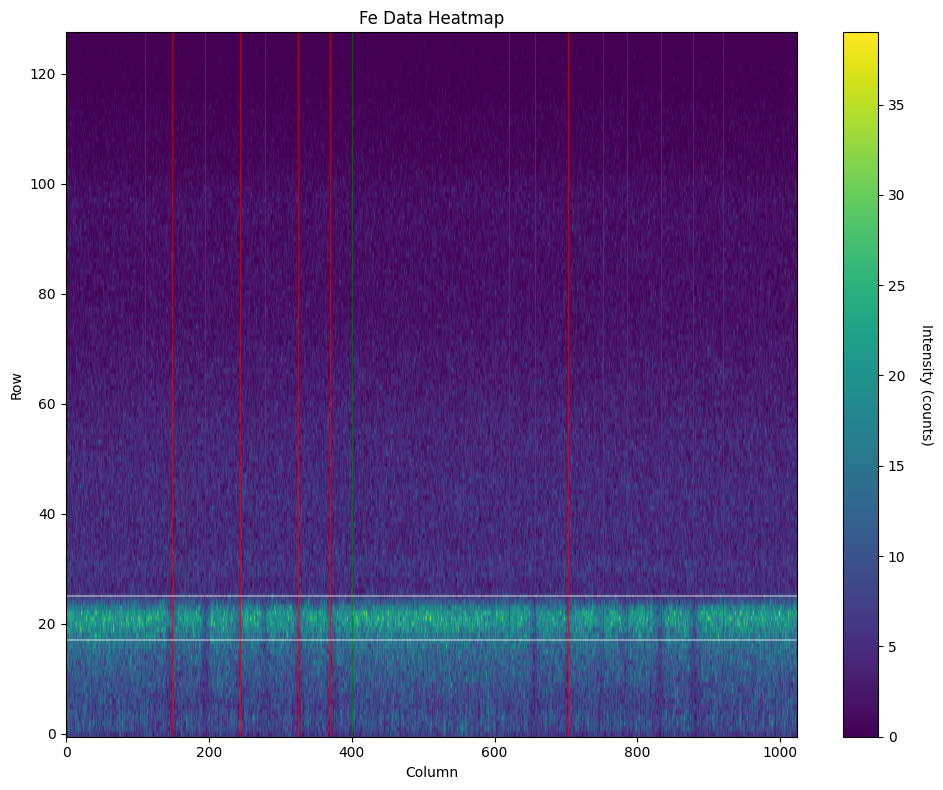

In [3]:
#READ DATA

filename = 'data/NaturalIron.txt'

with open(filename, 'r') as f:
    lines = f.readlines()

# Determine dimensions from file structure
n_rows = len(lines)
n_cols = len(lines[0].strip().split())

# Read as 2D numpy array
data_2d = np.loadtxt(filename).reshape(n_rows, n_cols)



row_low, row_high = 17, 25   # rows you want to use

# Fit 1:
fit1_low=110
fit1_high=400

peak1_a=148
peak1_b=195
peak1_c=244
peak1_d=278
peak1_e=325
peak1_f=370


# Fit 2:
fit2_low=620
fit2_high=920

peak2_a=148+508
peak2_b=195+508
peak2_c=244+508
peak2_d=278+508
peak2_e=325+508
peak2_f=370+508



# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(data_2d, cmap='viridis', aspect='auto', origin='lower')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Intensity (counts)', rotation=270, labelpad=20)

# Labels
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title('Fe Data Heatmap')

plt.tight_layout()

#peak
plt.axvline(peak1_a, color = 'red', linewidth = 0.4)
plt.axvline(peak1_b, color = 'red', linewidth = 0.4)
plt.axvline(peak1_c, color = 'red', linewidth = 0.4)
plt.axvline(peak1_d, color = 'red', linewidth = 0.4)
plt.axvline(peak1_e, color = 'red', linewidth = 0.4)
plt.axvline(peak1_f, color = 'red', linewidth = 0.4)

plt.axvline(peak2_a, color = 'red', linewidth = 0.4)
plt.axvline(peak2_b, color = 'red', linewidth = 0.4)
plt.axvline(peak2_c, color = 'red', linewidth = 0.4)
plt.axvline(peak2_d, color = 'red', linewidth = 0.4)
plt.axvline(peak2_e, color = 'red', linewidth = 0.4)
plt.axvline(peak2_f, color = 'red', linewidth = 0.4)



#fit
plt.axvline(fit1_low, color = 'green', linewidth = 0.4)
plt.axvline(fit1_high, color = 'green', linewidth = 0.4)
plt.axvline(fit2_low, color = 'green', linewidth = 0.4)
plt.axvline(fit2_high, color = 'green', linewidth = 0.4)

plt.axhline(row_low,color= "white",alpha=0.4)
plt.axhline(row_high,color= "white",alpha=0.4)
plt.show()


In [4]:
# Restrict to useful band in Y
band = data_2d[row_low:row_high+1, :]  # shape: (rows, cols)

# Sum (or average) over rows to make a 1D spectrum vs column
spectrum = band.sum(axis=0)   # or band.mean(axis=0)

channels = np.arange(band.shape[1])    # x-axis = channel index

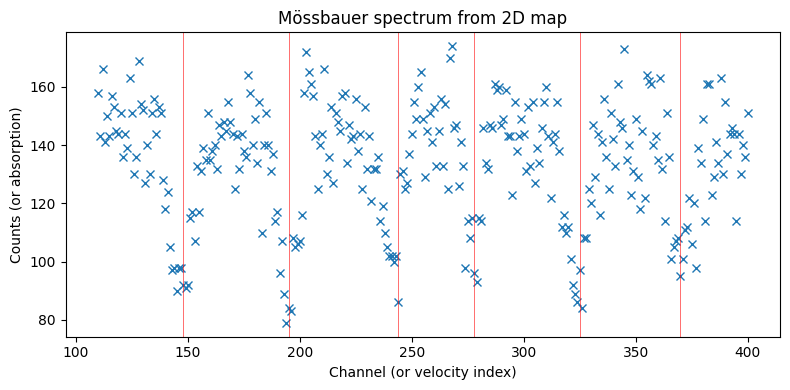

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(channels[fit1_low:fit1_high+1], spectrum[fit1_low:fit1_high+1],'x')
plt.xlabel('Channel (or velocity index)')
plt.ylabel('Counts (or absorption)')
plt.title('Mössbauer spectrum from 2D map')
plt.tight_layout()
plt.axvline(peak1_a, color = 'red', linewidth = 0.4)
plt.axvline(peak1_b, color = 'red', linewidth = 0.4)
plt.axvline(peak1_c, color = 'red', linewidth = 0.4)
plt.axvline(peak1_d, color = 'red', linewidth = 0.4)
plt.axvline(peak1_e, color = 'red', linewidth = 0.4)
plt.axvline(peak1_f, color = 'red', linewidth = 0.4)
plt.show()

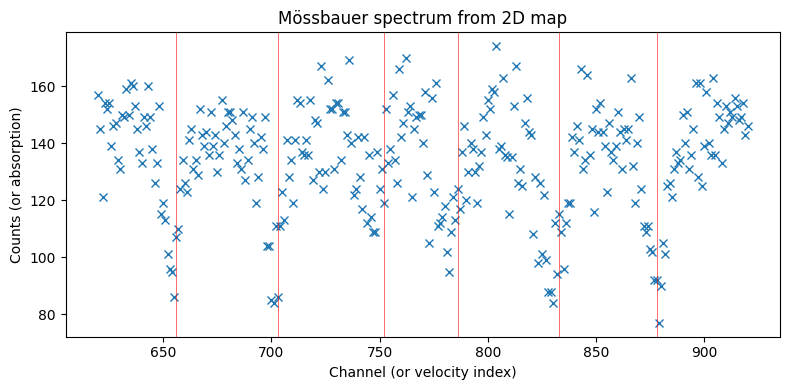

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(channels[fit2_low:fit2_high+1], spectrum[fit2_low:fit2_high+1],'x')
plt.xlabel('Channel (or velocity index)')
plt.ylabel('Counts (or absorption)')
plt.title('Mössbauer spectrum from 2D map')
plt.tight_layout()
plt.axvline(peak2_a, color = 'red', linewidth = 0.4)
plt.axvline(peak2_b, color = 'red', linewidth = 0.4)
plt.axvline(peak2_c, color = 'red', linewidth = 0.4)
plt.axvline(peak2_d, color = 'red', linewidth = 0.4)
plt.axvline(peak2_e, color = 'red', linewidth = 0.4)
plt.axvline(peak2_f, color = 'red', linewidth = 0.4)
plt.show()

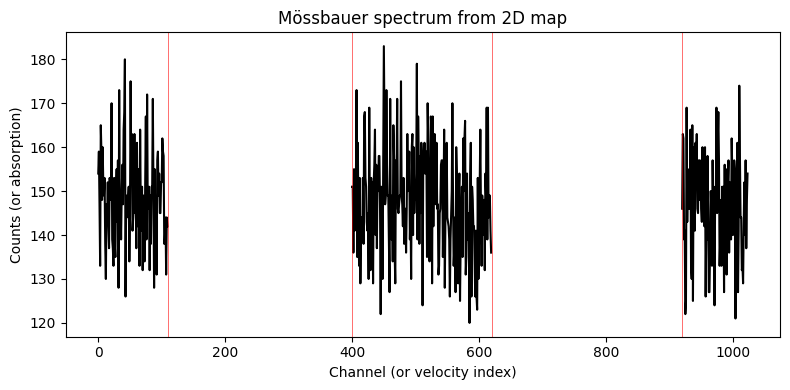

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(channels[0:fit1_low], spectrum[0:fit1_low],'-k')
plt.plot(channels[fit1_high:fit2_low], spectrum[fit1_high:fit2_low],'-k')
plt.plot(channels[fit2_high:], spectrum[fit2_high:],'-k')


plt.xlabel('Channel (or velocity index)')
plt.ylabel('Counts (or absorption)')
plt.title('Mössbauer spectrum from 2D map')
plt.tight_layout()

plt.axvline(fit1_low, color = 'red', linewidth = 0.4)
plt.axvline(fit1_high, color = 'red', linewidth = 0.4)
plt.axvline(fit2_low, color = 'red', linewidth = 0.4)
plt.axvline(fit2_high, color = 'red', linewidth = 0.4)

plt.show()

Background mean: 147.67592592592592
Background sigma: 11.867465090698817


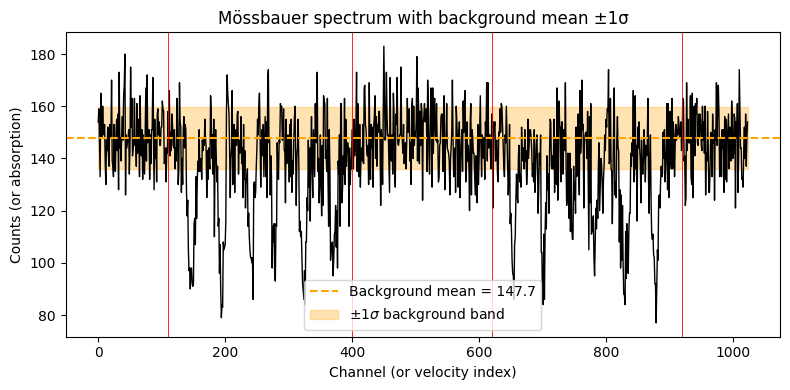

In [8]:
# Boolean mask for background channels (outside both peak regions)
bg_mask = (
    (channels < fit1_low) |
    ((channels > fit1_high) & (channels < fit2_low)) |
    (channels > fit2_high)
)

# Extract background y-values
bg_values = spectrum[bg_mask]

bg_mean = bg_values.mean()
bg_sigma = bg_values.std(ddof=1)   # sample sigma [web:35]

print("Background mean:", bg_mean)
print("Background sigma:", bg_sigma)

# Plot spectrum with background band
plt.figure(figsize=(8, 4))

# Your three background segments + peaks (optional: show full spectrum)
plt.plot(channels, spectrum, '-k', lw=1)

# Horizontal mean line
plt.axhline(bg_mean, color='orange', linestyle='--', label=f'Background mean = {bg_mean:.1f}')

# Shaded ±1σ band over the *background* x-range
x_bg = channels[bg_mask]
plt.fill_between(
    x_bg,
    bg_mean - bg_sigma,
    bg_mean + bg_sigma,
    color='orange',
    alpha=0.3,
    label=r'$\pm 1\sigma$ background band'
)  # [web:23][web:28]

# Peak markers
plt.axvline(fit1_low,  color='red', linewidth=0.6)
plt.axvline(fit1_high, color='red', linewidth=0.6)
plt.axvline(fit2_low,  color='red', linewidth=0.6)
plt.axvline(fit2_high, color='red', linewidth=0.6)

plt.xlabel('Channel (or velocity index)')
plt.ylabel('Counts (or absorption)')
plt.title('Mössbauer spectrum with background mean ±1σ')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
from scipy.optimize import curve_fit

'''
def gauss_bg(x, A1, x01, sigma1, c): 
    g1 = A1 * np.exp(-(x - x01)**2 / (2 * sigma1**2))
    bg = c
    return g1 + bg

'''

def gauss_bg(x, A1, x01, gamma1, c): #loretzian
    l1 = A1 * gamma1**2 / ((x - x01)**2 + gamma1**2)
    bg = c
    return l1 + bg

In [10]:
# Fit regions
# fit1_low, fit1_high = 150, 350
# fit2_low, fit2_high = 715, 850

# Extract x,y for each window
x1 = channels[peak1_a-20:peak1_a+20]
y1 = spectrum[peak1_a-20:peak1_a+20]
x2 = channels[peak1_b-20:peak1_b+20]
y2 = spectrum[peak1_b-20:peak1_b+20]
x3 = channels[peak1_c-20:peak1_c+20]
y3 = spectrum[peak1_c-20:peak1_c+20]
x4 = channels[peak1_d-20:peak1_d+20]
y4 = spectrum[peak1_d-20:peak1_d+20]
x5 = channels[peak1_e-20:peak1_e+20]
y5 = spectrum[peak1_e-20:peak1_e+20]
x6 = channels[peak1_f-20:peak1_f+20]
y6 = spectrum[peak1_f-20:peak1_f+20]

x7 = channels[peak2_a-20:peak2_a+20]
y7 = spectrum[peak2_a-20:peak2_a+20]
x8 = channels[peak2_b-20:peak2_b+20]
y8 = spectrum[peak2_b-20:peak2_b+20]
x9 = channels[peak2_c-20:peak2_c+20]
y9 = spectrum[peak2_c-20:peak2_c+20]
x10 = channels[peak2_d-20:peak2_d+20]
y10 = spectrum[peak2_d-20:peak2_d+20]
x11 = channels[peak2_e-20:peak2_e+20]
y11 = spectrum[peak2_e-20:peak2_e+20]
x12 = channels[peak2_f-20:peak2_f+20]
y12 = spectrum[peak2_f-20:peak2_f+20]

In [11]:
# Peak windows for guidance
# peak1_low, peak1_high = 225, 275
# peak2_low, peak2_high = 750, 800

x01_guess = peak1_a
x02_guess = peak1_b
x03_guess = peak1_c
x04_guess = peak1_d
x05_guess = peak1_e
x06_guess = peak1_f

x07_guess = peak2_a
x08_guess = peak2_b
x09_guess = peak2_c
x010_guess = peak2_d
x011_guess = peak2_e
x012_guess = peak2_f


# Rough amplitudes: dips below background
A1_guess = - (bg_mean - y1.min()) * 0.8
A2_guess = - (bg_mean - y1.min()) * 0.8
A3_guess = - (bg_mean - y1.min()) * 0.8
A4_guess = - (bg_mean - y1.min()) * 0.8
A5_guess = - (bg_mean - y1.min()) * 0.8
A6_guess = - (bg_mean - y1.min()) * 0.8

A7_guess = - (bg_mean - y2.min()) * 0.8
A8_guess = - (bg_mean - y2.min()) * 0.8
A9_guess = - (bg_mean - y2.min()) * 0.8
A10_guess = - (bg_mean - y2.min()) * 0.8
A11_guess = - (bg_mean - y2.min()) * 0.8
A12_guess = - (bg_mean - y2.min()) * 0.8

sigma_guess1 = 8.0
sigma_guess2 = 8.0
sigma_guess3 = 8.0
sigma_guess4 = 8.0
sigma_guess5 = 8.0
sigma_guess6 = 8.0

sigma_guess7 = 8.0
sigma_guess8 = 8.0
sigma_guess9 = 8.0
sigma_guess10 = 8.0
sigma_guess11 = 8.0
sigma_guess12 = 8.0

# Background init from edges of each window (assume nearly flat)
# def linear_bg_guess(x, y):
#     c0 = (y[0] + y[-1]) / 2
#     m0 = (y[-1] - y[0]) / (x[-1] - x[0] + 1e-9)
#     return m0, c0

m1_guess, c1_guess = [0,bg_mean]
m2_guess, c2_guess = [0,bg_mean]
m3_guess, c3_guess = [0,bg_mean]
m4_guess, c4_guess = [0,bg_mean]

In [12]:
# Fit 1
p0_1 = [A1_guess, x01_guess, sigma_guess1, c1_guess]
p0_2 = [A2_guess, x02_guess, sigma_guess2, c1_guess]
p0_3 = [A3_guess, x03_guess, sigma_guess3, c1_guess]

p0_4 = [A4_guess, x04_guess, sigma_guess4, c2_guess]
p0_5 = [A5_guess, x05_guess, sigma_guess5, c2_guess]
p0_6 = [A6_guess, x06_guess, sigma_guess6, c2_guess]

print(p0_1)

popt1, pcov1 = curve_fit(gauss_bg, x1, y1, p0=p0_1)  # [web:46][web:49]
popt2, pcov2 = curve_fit(gauss_bg, x2, y2, p0=p0_2)
popt3, pcov3 = curve_fit(gauss_bg, x3, y3, p0=p0_3)  # [web:46][web:49]
popt4, pcov4 = curve_fit(gauss_bg, x4, y4, p0=p0_4)
popt5, pcov5 = curve_fit(gauss_bg, x5, y5, p0=p0_5)  # [web:46][web:49]
popt6, pcov6 = curve_fit(gauss_bg, x6, y6, p0=p0_6)

# Fit 2
p0_7 = [A7_guess, x07_guess, sigma_guess7, c3_guess]
p0_8 = [A8_guess, x08_guess, sigma_guess8, c3_guess]
p0_9 = [A9_guess, x09_guess, sigma_guess9, c3_guess]
p0_10 = [A10_guess, x010_guess, sigma_guess10, c3_guess]
p0_11 = [A11_guess, x011_guess, sigma_guess11, c3_guess]
p0_12 = [A12_guess, x012_guess, sigma_guess12, c3_guess]


popt7, pcov7 = curve_fit(gauss_bg, x7, y7, p0=p0_7)
popt8, pcov8 = curve_fit(gauss_bg, x8, y8, p0=p0_8)
popt9, pcov9 = curve_fit(gauss_bg, x9, y9, p0=p0_9)  # [web:46][web:49]
popt10, pcov10 = curve_fit(gauss_bg, x10, y10, p0=p0_10)
popt11, pcov11 = curve_fit(gauss_bg, x11, y11, p0=p0_11)  # [web:46][web:49]
popt12, pcov12 = curve_fit(gauss_bg, x12, y12, p0=p0_12)


[np.float64(-46.14074074074074), 148, 8.0, np.float64(147.67592592592592)]


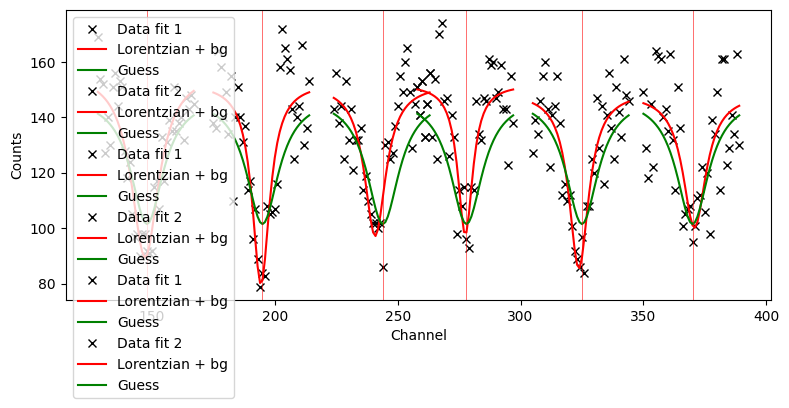

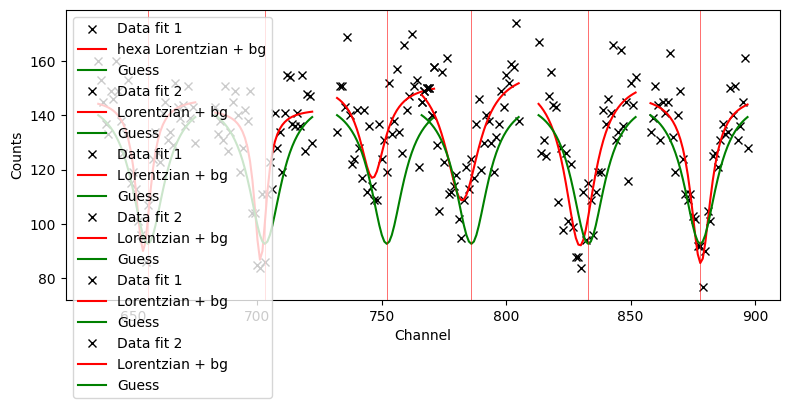

In [27]:
# Fit 1
y1_fit = gauss_bg(x1, *popt1)
y1_guess = gauss_bg(x1, *p0_1)
y2_fit = gauss_bg(x2, *popt2)
y2_guess = gauss_bg(x2, *p0_2)
y3_fit = gauss_bg(x3, *popt3)
y3_guess = gauss_bg(x3, *p0_3)
y4_fit = gauss_bg(x4, *popt4)
y4_guess = gauss_bg(x4, *p0_4)
y5_fit = gauss_bg(x5, *popt5)
y5_guess = gauss_bg(x5, *p0_5)
y6_fit = gauss_bg(x6, *popt6)
y6_guess = gauss_bg(x6, *p0_6)

plt.figure(figsize=(8, 4))
plt.plot(x1, y1, 'kx', label='Data fit 1')
plt.plot(x1, y1_fit, 'r-', label='Lorentzian + bg')
plt.plot(x1, y1_guess, 'g-', label='Guess')
plt.plot(x2, y2, 'kx', label='Data fit 2')
plt.plot(x2, y2_fit, 'r-', label='Lorentzian + bg')
plt.plot(x2, y2_guess, 'g-', label='Guess')
plt.plot(x3, y3, 'kx', label='Data fit 1')
plt.plot(x3, y3_fit, 'r-', label='Lorentzian + bg')
plt.plot(x3, y3_guess, 'g-', label='Guess')
plt.plot(x4, y4, 'kx', label='Data fit 2')
plt.plot(x4, y4_fit, 'r-', label='Lorentzian + bg')
plt.plot(x4, y4_guess, 'g-', label='Guess')
plt.plot(x5, y5, 'kx', label='Data fit 1')
plt.plot(x5, y5_fit, 'r-', label='Lorentzian + bg')
plt.plot(x5, y5_guess, 'g-', label='Guess')
plt.plot(x6, y6, 'kx', label='Data fit 2')
plt.plot(x6, y6_fit, 'r-', label='Lorentzian + bg')
plt.plot(x6, y6_guess, 'g-', label='Guess')

plt.axvline(peak1_a, color = 'red', linewidth = 0.4)
plt.axvline(peak1_b, color = 'red', linewidth = 0.4)
plt.axvline(peak1_c, color = 'red', linewidth = 0.4)
plt.axvline(peak1_d, color = 'red', linewidth = 0.4)
plt.axvline(peak1_e, color = 'red', linewidth = 0.4)
plt.axvline(peak1_f, color = 'red', linewidth = 0.4)
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
plt.savefig('iron_fit1.png')

plt.show()

# Fit 2
y7_fit = gauss_bg(x7, *popt7)
y7_guess = gauss_bg(x7, *p0_7)
y8_fit = gauss_bg(x8, *popt8)
y8_guess = gauss_bg(x8, *p0_8)
y9_fit = gauss_bg(x9, *popt9)
y9_guess = gauss_bg(x9, *p0_9)
y10_fit = gauss_bg(x10, *popt10)
y10_guess = gauss_bg(x10, *p0_10)
y11_fit = gauss_bg(x11, *popt11)
y11_guess = gauss_bg(x11, *p0_11)
y12_fit = gauss_bg(x12, *popt12)
y12_guess = gauss_bg(x12, *p0_12)

plt.figure(figsize=(8, 4))
plt.plot(x7, y7, 'kx', label='Data fit 1')
plt.plot(x7, y7_fit, 'r-', label='hexa Lorentzian + bg')
plt.plot(x7, y7_guess, 'g-', label='Guess')
plt.plot(x8, y8, 'kx', label='Data fit 2')
plt.plot(x8, y8_fit, 'r-', label='Lorentzian + bg')
plt.plot(x8, y8_guess, 'g-', label='Guess')
plt.plot(x9, y9, 'kx', label='Data fit 1')
plt.plot(x9, y9_fit, 'r-', label='Lorentzian + bg')
plt.plot(x9, y9_guess, 'g-', label='Guess')
plt.plot(x10, y10, 'kx', label='Data fit 2')
plt.plot(x10, y10_fit, 'r-', label='Lorentzian + bg')
plt.plot(x10, y10_guess, 'g-', label='Guess')
plt.plot(x11, y11, 'kx', label='Data fit 1')
plt.plot(x11, y11_fit, 'r-', label='Lorentzian + bg')
plt.plot(x11, y11_guess, 'g-', label='Guess')
plt.plot(x12, y12, 'kx', label='Data fit 2')
plt.plot(x12, y12_fit, 'r-', label='Lorentzian + bg')
plt.plot(x12, y12_guess, 'g-', label='Guess')


plt.axvline(peak2_a, color = 'red', linewidth = 0.4)
plt.axvline(peak2_b, color = 'red', linewidth = 0.4)
plt.axvline(peak2_c, color = 'red', linewidth = 0.4)
plt.axvline(peak2_d, color = 'red', linewidth = 0.4)
plt.axvline(peak2_e, color = 'red', linewidth = 0.4)
plt.axvline(peak2_f, color = 'red', linewidth = 0.4)
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
plt.savefig('iron_fit2.png')
plt.show()


In [28]:


print(fr'Peak 1: {popt1[1]} +/- {popt1[2]}')
print(fr'Peak 2: {popt2[1]} +/- {popt2[2]}')
print(fr'Peak 3: {popt3[1]} +/- {popt3[2]}')
print(fr'Peak 4: {popt4[1]} +/- {popt4[2]}')
print(fr'Peak 5: {popt5[1]} +/- {popt5[2]}')
print(fr'Peak 6: {popt6[1]} +/- {popt6[2]}')

print(f'\n')
print(fr'Peak 1: {popt7[1]} +/- {popt7[2]}')
print(fr'Peak 2: {popt8[1]} +/- {popt8[2]}')
print(fr'Peak 3: {popt9[1]} +/- {popt9[2]}')
print(fr'Peak 4: {popt10[1]} +/- {popt10[2]}')
print(fr'Peak 5: {popt11[1]} +/- {popt11[2]}')
print(fr'Peak 6: {popt12[1]} +/- {popt12[2]}')

Peak 1: 147.2203828209449 +/- 6.8043648036012625
Peak 2: 194.37127551539342 +/- -4.318779297667057
Peak 3: 240.8498188622831 +/- 5.290973911483577
Peak 4: 277.5175124794321 +/- 3.668292196379964
Peak 5: 323.7327177658723 +/- 4.881932248691648
Peak 6: 370.7803278960756 +/- 5.703283757676815


Peak 1: 654.0818736835658 +/- 3.644247889535502
Peak 2: 701.2159706916514 +/- 3.06243366505651
Peak 3: 746.312909475029 +/- 6.1600594114874205
Peak 4: 782.2928802077289 +/- 8.223734370155283
Peak 5: 829.6044491337303 +/- 7.37248177243372
Peak 6: 878.1730269450865 +/- 4.972645521676382


In [29]:
peak1 = v(ufloat(popt1[1], pcov1[1,1]))
print('Peak 1: ', peak1, 'm/s')

sigma1 = v(ufloat(popt1[2], pcov1[2,2]))
print('Sigma 1: ', sigma1, 'm/s')

peak2 = v(ufloat(popt2[1], pcov2[1,1]))
print('Peak 2: ', peak2, 'm/s')

sigma2 = v(ufloat(popt2[2], pcov2[2,2]))
print('Sigma 2: ', sigma2, 'm/s')

peak3 = v(ufloat(popt3[1], pcov3[1,1]))
print('Peak 3: ', peak3, 'm/s')

sigma3 = v(ufloat(popt3[2], pcov3[2,2]))
print('Sigma 3: ', sigma3, 'm/s')

peak4 = v(ufloat(popt4[1], pcov4[1,1]))
print('Peak 4: ', peak4, 'm/s')

sigma4 = v(ufloat(popt4[2], pcov4[2,2]))
print('Sigma 4: ', sigma4, 'm/s')

peak5 = v(ufloat(popt5[1], pcov5[1,1]))
print('Peak 5: ', peak5, 'm/s')

sigma5 = v(ufloat(popt5[2], pcov5[2,2]))
print('Sigma 5: ', sigma5, 'm/s')

peak6 = v(ufloat(popt6[1], pcov6[1,1]))
print('Peak 6: ', peak6, 'm/s')

sigma6 = v(ufloat(popt6[2], pcov6[2,2]))
print('Sigma 6: ', sigma6, 'm/s')

print(f'\n')

peak7 = v(ufloat(popt7[1], pcov7[1,1]))
print('Peak 1: ', peak7, 'm/s')

sigma7 = v(ufloat(popt7[2], pcov7[2,2]))
print('Sigma 1: ', sigma7, 'm/s')

peak8 = v(ufloat(popt8[1], pcov8[1,1]))
print('Peak 2: ', peak8, 'm/s')

sigma8 = v(ufloat(popt8[2], pcov8[2,2]))
print('Sigma 2: ', sigma8, 'm/s')

peak9 = v(ufloat(popt9[1], pcov9[1,1]))
print('Peak 3: ', peak9, 'm/s')

sigma9 = v(ufloat(popt9[2], pcov9[2,2]))
print('Sigma 3: ', sigma9, 'm/s')

peak10 = v(ufloat(popt10[1], pcov10[1,1]))
print('Peak 4: ', peak10, 'm/s')

sigma10 = v(ufloat(popt10[2], pcov10[2,2]))
print('Sigma 4: ', sigma10, 'm/s')

peak11 = v(ufloat(popt11[1], pcov11[1,1]))
print('Peak 5: ', peak11, 'm/s')

sigma11 = v(ufloat(popt11[2], pcov11[2,2]))
print('Sigma 5: ', sigma11, 'm/s')

peak12 = v(ufloat(popt12[1], pcov12[1,1]))
print('Peak 6: ', peak12, 'm/s')

sigma12 = v(ufloat(popt12[2], pcov12[2,2]))
print('Sigma 6: ', sigma12, 'm/s')


Peak 1:  0.005308+/-0.000009 m/s
Sigma 1:  0.01213+/-0.00007 m/s
Peak 2:  0.003018+/-0.000011 m/s
Sigma 2:  0.01267+/-0.00005 m/s
Peak 3:  0.000761+/-0.000012 m/s
Sigma 3:  0.01220+/-0.00006 m/s
Peak 4:  -0.001020+/-0.000013 m/s
Sigma 4:  0.01228+/-0.00005 m/s
Peak 5:  -0.003264+/-0.000009 m/s
Sigma 5:  0.01222+/-0.00005 m/s
Peak 6:  -0.00555+/-0.00004 m/s
Sigma 6:  0.01218+/-0.00022 m/s


Peak 1:  -0.005564+/-0.000006 m/s
Sigma 1:  0.012281+/-0.000022 m/s
Peak 2:  -0.003275+/-0.000008 m/s
Sigma 2:  0.012309+/-0.000026 m/s
Peak 3:  -0.00108+/-0.00005 m/s
Sigma 3:  0.01216+/-0.00029 m/s
Peak 4:  0.00066+/-0.00004 m/s
Sigma 4:  0.0121+/-0.0004 m/s
Peak 5:  0.002962+/-0.000023 m/s
Sigma 5:  0.01210+/-0.00019 m/s
Peak 6:  0.005322+/-0.000007 m/s
Sigma 6:  0.01222+/-0.00004 m/s


In [30]:
peak1 = v(ufloat(popt1[1], pcov1[1,1]))
print('Peak 1: ', peak1, 'm/s')

sigma1 = v(ufloat(popt1[2], pcov1[2,2]))
print('Sigma 1: ', sigma1, 'm/s')

peak2 = v(ufloat(popt2[1], pcov2[1,1]))
print('Peak 2: ', peak2, 'm/s')

sigma2 = v(ufloat(popt2[2], pcov2[2,2]))
print('Sigma 2: ', sigma2, 'm/s')

peak3 = v(ufloat(popt3[1], pcov3[1,1]))
print('Peak 3: ', peak3, 'm/s')

sigma3 = v(ufloat(popt3[2], pcov3[2,2]))
print('Sigma 3: ', sigma3, 'm/s')

peak4 = v(ufloat(popt4[1], pcov4[1,1]))
print('Peak 4: ', peak4, 'm/s')

sigma4 = v(ufloat(popt4[2], pcov4[2,2]))
print('Sigma 4: ', sigma4, 'm/s')

peak5 = v(ufloat(popt5[1], pcov5[1,1]))
print('Peak 5: ', peak5, 'm/s')

sigma5 = v(ufloat(popt5[2], pcov5[2,2]))
print('Sigma 5: ', sigma5, 'm/s')

peak6 = v(ufloat(popt6[1], pcov6[1,1]))
print('Peak 6: ', peak6, 'm/s')

sigma6 = v(ufloat(popt6[2], pcov6[2,2]))
print('Sigma 6: ', sigma6, 'm/s')

print(f'\n')

peak7 = v(ufloat(popt7[1], pcov7[1,1]))
print('Peak 7: ', peak7, 'm/s')

sigma7 = v(ufloat(popt7[2], pcov7[2,2]))
print('Sigma 7: ', sigma7, 'm/s')

peak8 = v(ufloat(popt8[1], pcov8[1,1]))
print('Peak 8: ', peak8, 'm/s')

sigma8 = v(ufloat(popt8[2], pcov8[2,2]))
print('Sigma 8: ', sigma8, 'm/s')

peak9 = v(ufloat(popt9[1], pcov9[1,1]))
print('Peak 9: ', peak9, 'm/s')

sigma9 = v(ufloat(popt9[2], pcov9[2,2]))
print('Sigma 9: ', sigma9, 'm/s')

peak10 = v(ufloat(popt10[1], pcov10[1,1]))
print('Peak 10: ', peak10, 'm/s')

sigma10 = v(ufloat(popt10[2], pcov10[2,2]))
print('Sigma 10: ', sigma10, 'm/s')

peak11 = v(ufloat(popt11[1], pcov11[1,1]))
print('Peak 11: ', peak11, 'm/s')

sigma11 = v(ufloat(popt11[2], pcov11[2,2]))
print('Sigma 11: ', sigma11, 'm/s')

peak12 = v(ufloat(popt12[1], pcov12[1,1]))
print('Peak 12: ', peak12, 'm/s')

sigma12 = v(ufloat(popt12[2], pcov12[2,2]))
print('Sigma 12: ', sigma12, 'm/s')

print(f'\n')
E_0 = 14.4e3 # E in eV
c = 3e8 # c in m/s

def E(vel):
    return E_0/c*vel


Peak 1:  0.005308+/-0.000009 m/s
Sigma 1:  0.01213+/-0.00007 m/s
Peak 2:  0.003018+/-0.000011 m/s
Sigma 2:  0.01267+/-0.00005 m/s
Peak 3:  0.000761+/-0.000012 m/s
Sigma 3:  0.01220+/-0.00006 m/s
Peak 4:  -0.001020+/-0.000013 m/s
Sigma 4:  0.01228+/-0.00005 m/s
Peak 5:  -0.003264+/-0.000009 m/s
Sigma 5:  0.01222+/-0.00005 m/s
Peak 6:  -0.00555+/-0.00004 m/s
Sigma 6:  0.01218+/-0.00022 m/s


Peak 7:  -0.005564+/-0.000006 m/s
Sigma 7:  0.012281+/-0.000022 m/s
Peak 8:  -0.003275+/-0.000008 m/s
Sigma 8:  0.012309+/-0.000026 m/s
Peak 9:  -0.00108+/-0.00005 m/s
Sigma 9:  0.01216+/-0.00029 m/s
Peak 10:  0.00066+/-0.00004 m/s
Sigma 10:  0.0121+/-0.0004 m/s
Peak 11:  0.002962+/-0.000023 m/s
Sigma 11:  0.01210+/-0.00019 m/s
Peak 12:  0.005322+/-0.000007 m/s
Sigma 12:  0.01222+/-0.00004 m/s




In [31]:
Peak1 = E(peak1 + peak12) / 2
print('Peak 1: ', Peak1, 'eV')

Sigma1 = (sigma1 + sigma12) / 2
print('Sigma 1: ', Sigma1, 'm/s')

Peak2 = E(peak2 + peak11) / 2
print('Peak 2: ', Peak2, 'eV')

Sigma2 = (sigma2 + sigma11) / 2
print('Sigma 2: ', Sigma2, 'm/s')

Peak3 = E(peak3 + peak10) / 2
print('Peak 3: ', Peak3, 'eV')

Sigma3 = (sigma3 + sigma10) / 2
print('Sigma 3: ', Sigma3, 'm/s')

Peak4 = E(peak4 + peak9) / 2
print('Peak 4: ', Peak4, 'eV')

Sigma4 = (sigma4 + sigma9) / 2
print('Sigma 4: ', Sigma4, 'm/s')

Peak5 = E(peak5 + peak8) / 2
print('Peak 5: ', Peak5, 'eV')

Sigma5 = (sigma5 + sigma8) / 2
print('Sigma 5: ', Sigma5, 'm/s')

Peak6 = E(peak6 + peak7) / 2
print('Peak 6: ', Peak6, 'eV')

Sigma6 = (sigma6 + sigma7) / 2
print('Sigma 6: ', Sigma6, 'm/s')


Peak 1:  (2.5511+/-0.0028)e-07 eV
Sigma 1:  0.01217+/-0.00004 m/s
Peak 2:  (1.435+/-0.006)e-07 eV
Sigma 2:  0.01238+/-0.00010 m/s
Peak 3:  (3.42+/-0.10)e-08 eV
Sigma 3:  0.01213+/-0.00019 m/s
Peak 4:  (-5.05+/-0.13)e-08 eV
Sigma 4:  0.01222+/-0.00015 m/s
Peak 5:  (-1.5694+/-0.0028)e-07 eV
Sigma 5:  0.012265+/-0.000026 m/s
Peak 6:  (-2.667+/-0.009)e-07 eV
Sigma 6:  0.01223+/-0.00011 m/s


In [32]:
isoshift = (Peak1+Peak2+Peak3+Peak4+Peak5+Peak6)/6
E_0 = 14.4e3 # E in eV
c = 3e8 # c in m/s

def E(vel):
    return E_0/c*vel

pos1 = (Peak1-Peak6)/2
pos2 = (Peak2-Peak5)/2
pos3 = (Peak3-Peak4)/2

print('Isoshift: ', isoshift*1000, 'mm/s  =  ', isoshift*E_0/c, 'eV')

print('pos1: ', pos1*1000, 'mm/s  =  ', E(pos1), 'eV')
print('pos2: ', pos2*1000, 'mm/s  =  ', E(pos2), 'eV')
print('pos3: ', pos3*1000, 'mm/s  =  ', E(pos3), 'eV')

Isoshift:  (-6.89+/-0.33)e-06 mm/s  =   (-3.31+/-0.16)e-13 eV
pos1:  0.0002609+/-0.0000005 mm/s  =   (1.2524+/-0.0023)e-11 eV
pos2:  0.00015023+/-0.00000033 mm/s  =   (7.211+/-0.016)e-12 eV
pos3:  (4.23+/-0.08)e-05 mm/s  =   (2.03+/-0.04)e-12 eV


In [33]:
fe_E_1 = E(pos1)
fe_E_2 = E(pos2)
fe_E_3 = E(pos3)

# One of these four conditions should be (close to) 0
fe_C_1 = fe_E_1 - (2 * fe_E_2) - fe_E_3
fe_C_2 = fe_E_1 - (2 * fe_E_2) + fe_E_3
fe_C_3 = fe_E_1 - fe_E_2 - (2 * fe_E_3)
fe_C_4 = fe_E_1 + fe_E_2 + (2 * fe_E_3)
print("Condition 1 is ", fe_C_1, "eV (valid if 0)")
print("Condition 2 is ", fe_C_2, "eV (valid if 0)")
print("Condition 3 is ", fe_C_3, "eV (valid if 0)")
print("Condition 4 is ", fe_C_4, "eV (valid if 0)")

Condition 1 is  (-3.93+/-0.05)e-12 eV (valid if 0)
Condition 2 is  (1.3+/-0.5)e-13 eV (valid if 0)
Condition 3 is  (1.25+/-0.08)e-12 eV (valid if 0)
Condition 4 is  (2.380+/-0.008)e-11 eV (valid if 0)


In [34]:
# Calculations for case 2
fe_A = fe_E_1 - fe_E_2
fe_G = - fe_E_2 - fe_E_3
print("A =", fe_A, "eV")
print("G =", fe_G, "eV")

A = (5.313+/-0.028)e-12 eV
G = (-9.24+/-0.04)e-12 eV


In [35]:
I_g = 1/2 # nuclear angular momentum quantum number of groundstate
mu_k = 3.1524512550e-8 # eV / T
mu_g = ufloat(0.0903, 0.0007) * mu_k
B = fe_G * I_g / mu_g
print("Magnetic field B =", B, "T")

Magnetic field B = -0.001624+/-0.000015 T


In [36]:
I_a = 3/2 # nuclear angular momentum quantum number of excited state
mu_a = fe_A * I_a / B
print("mu_a = ", mu_a, "eV/T = ", (mu_a / mu_k), "mu_k = ", (mu_a / mu_g), "mu_g")

mu_a =  (-4.91+/-0.05)e-09 eV/T =  -0.1557+/-0.0017 mu_k =  -1.724+/-0.013 mu_g
